In [161]:
import math
from sympy import *
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
np.set_printoptions( linewidth=np.inf, precision=2)
def Plot(f, interval):
    x_vals = linspace(interval[0], interval[1], 1000)
    lam_y = lambdify(x, f, modules = ['numpy'])
    y_vals = lam_y(x_vals)
    plt.plot(x_vals, y_vals, label = "ssosdfa")
    #plt.show()

In [162]:
def Gram(e, interval):
    n = len(e)
    a = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            a[i][j] = integrate(e[i]*e[j], (x, interval)).evalf(3)
    return a
def Project(f, e, interval):
    n = len(e)
    a = np.zeros(n)
    for i in range(n):
        a[i] = integrate(f*e[i], (x,interval)).evalf(3)
    return a

In [163]:
x = symbols("x")

e0 = 1
e1 = x
e2 = x**2
e3 = x**3
e4 = x**4
e = (e0,e1,e2,e3,e4)

f = sin(x) + cos(x)
interval = [-3,3]

In [164]:
A = Gram(e, interval)
X = Project(f, e, interval)
result = np.linalg.solve(A,X)
print("A = ")
print(A)
print("X =      ", X)
print("result = ", result)

A = 
[[   6.      0.     18.      0.     97.2 ]
 [   0.     18.      0.     97.2     0.  ]
 [  18.      0.     97.2     0.    624.88]
 [   0.     97.2     0.    624.88    0.  ]
 [  97.2     0.    624.88    0.   4374.  ]]
X =       [  0.28   6.22  -9.9   23.75 -72.12]
result =  [ 0.98  0.88 -0.46 -0.1   0.03]


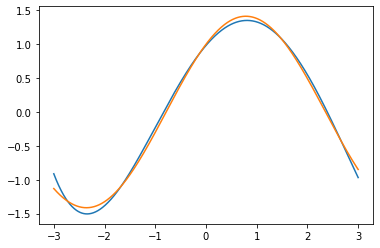

In [165]:
estimator = 0; xn = 1
for i in range(len(result)):
    estimator += result[i] * xn
    xn *= x

estimator

Plot(estimator, interval)
Plot(f, interval)